<a href="https://colab.research.google.com/github/PerawitDeawpanich/CN334-Template-Perawit/blob/master/SF251_In_Class_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise 4

Once done, upload to MS Teams

## Pokemon Dataset Part 4

Data from https://www.kaggle.com/datasets/cristobalmitchell/pokedex

In [1]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv

--2026-02-06 08:29:19--  https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331632 (324K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>] 323.86K  --.-KB/s    in 0.006s  

2026-02-06 08:29:19 (52.1 MB/s) - ‘pokemon.csv’ saved [331632/331632]



In [2]:
import pandas as pd
from plotnine import *

In [16]:
#Load the data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,...,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."


In [4]:
pokemon.columns

Index(['national_number', 'gen', 'english_name', 'japanese_name',
       'primary_type', 'secondary_type', 'classification', 'percent_male',
       'percent_female', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'abilities_0', 'abilities_1', 'abilities_2',
       'abilities_hidden', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'is_sublegendary',
       'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2',
       'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax',
       'mega_evolution', 'mega_evolution_alt', 'description'],
      dtype='object')

**Q1**: EDA 1: Plot the number of pokemon in each gen. You can quickly verify that the data is right by checking the numbers on the internet.

In [54]:
gen_count = pokemon["gen"].value_counts().reset_index()
gen_count.columns = ["gen", "count"]
gen_count

,gen,count
0,V,156
1,I,151
2,III,135
3,IV,107
4,II,100
5,VIII,89
6,VII,88
7,VI,72


**Q2**: Adding count numbers to the previous plot

1.  First create a new dataframe of the number of pokemon in each gen. You can do this using `value_counts` (with `reset_index`) or `groupby`
2.  Use this new dataframe with `geom_text`. Think about how to position the text better. To make it more readable, you can also change the color of the text using `color = 'red'` inside `aes`




In [8]:
gen_count = ...
gen_count

Ellipsis

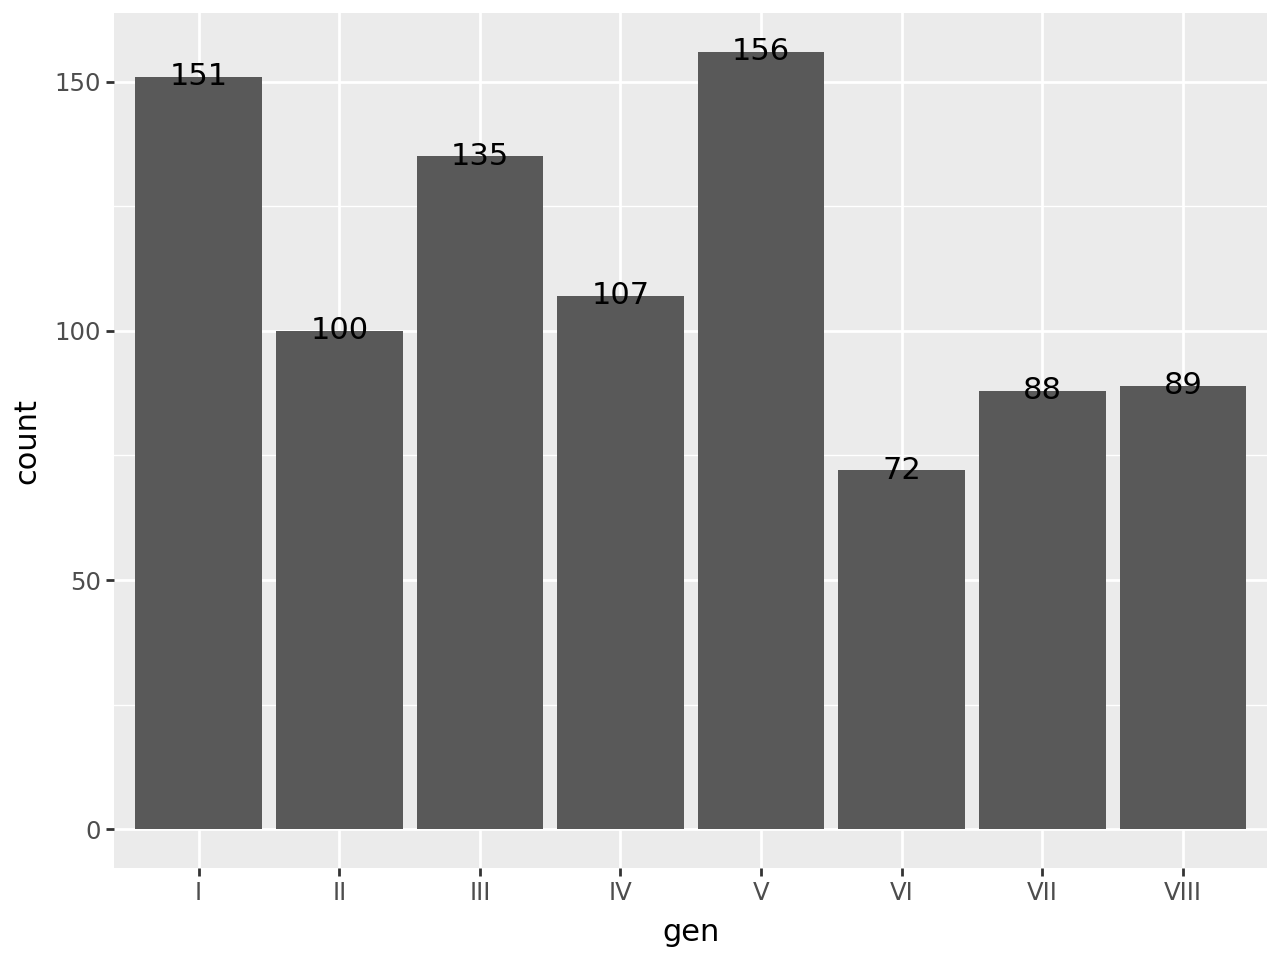

In [ ]:
# Example

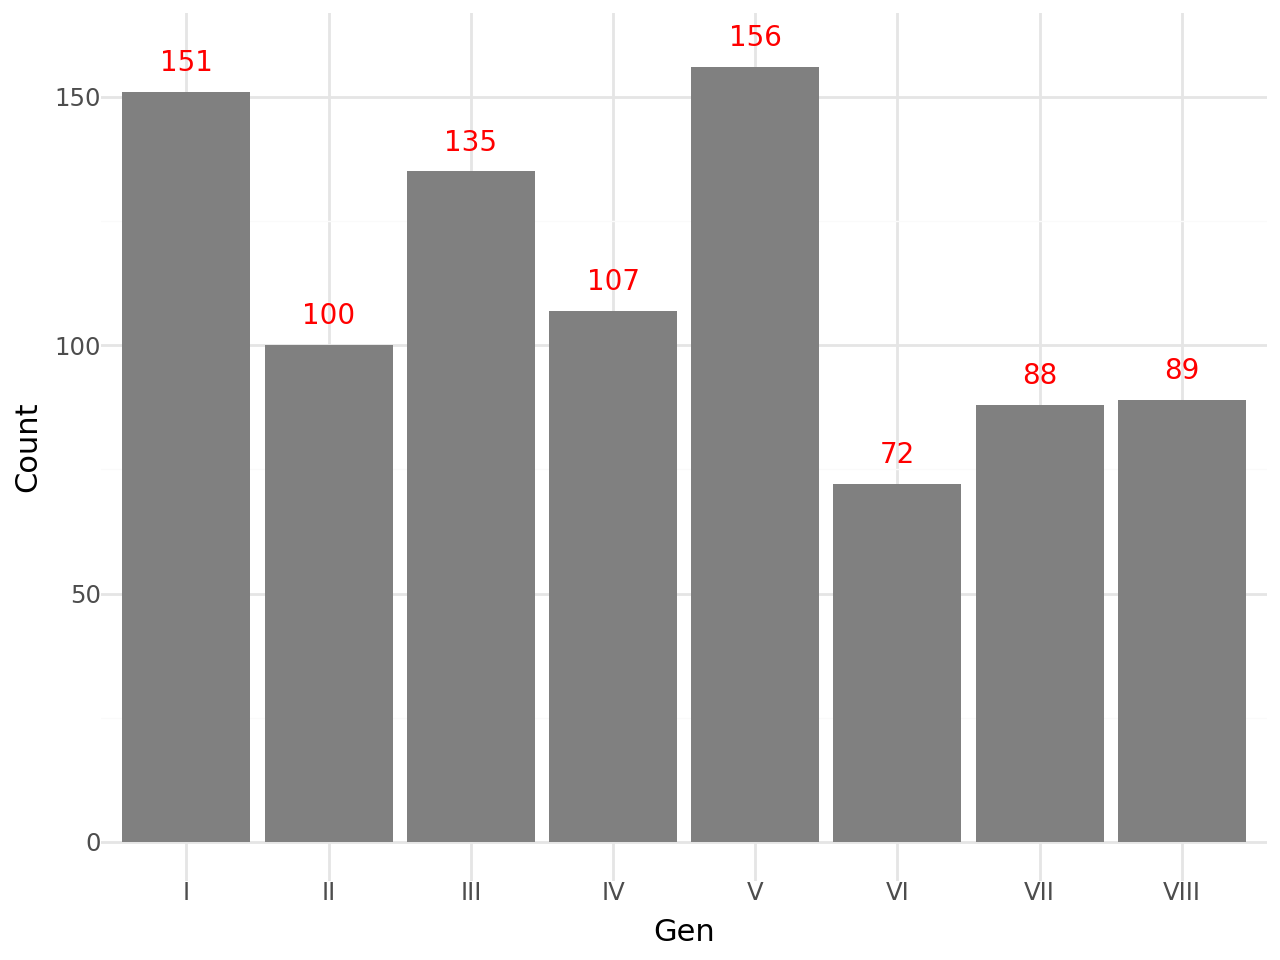

In [11]:
gen_count = (
    pokemon
    .groupby("gen")
    .size()
    .reset_index(name="count")
)


from plotnine import *

(
    ggplot(gen_count, aes(x="factor(gen)", y="count"))
    + geom_bar(stat="identity", fill="gray")
    + geom_text(
        aes(label="count"),
        va="bottom",
        color="red",
        size=10,
        nudge_y=3
    )
    + labs(
        x="Gen",
        y="Count"
    )
    + theme_minimal()
)

**Q3**: EDA 2: Plot the total stats vs. rarity.
- Rarity: is the rarity of pokemon: `normal`, `sublegendary`, `mythical`, and `legendary`. (Same as the previous exercise)
- Total stats: The sum of all stats (`hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`).

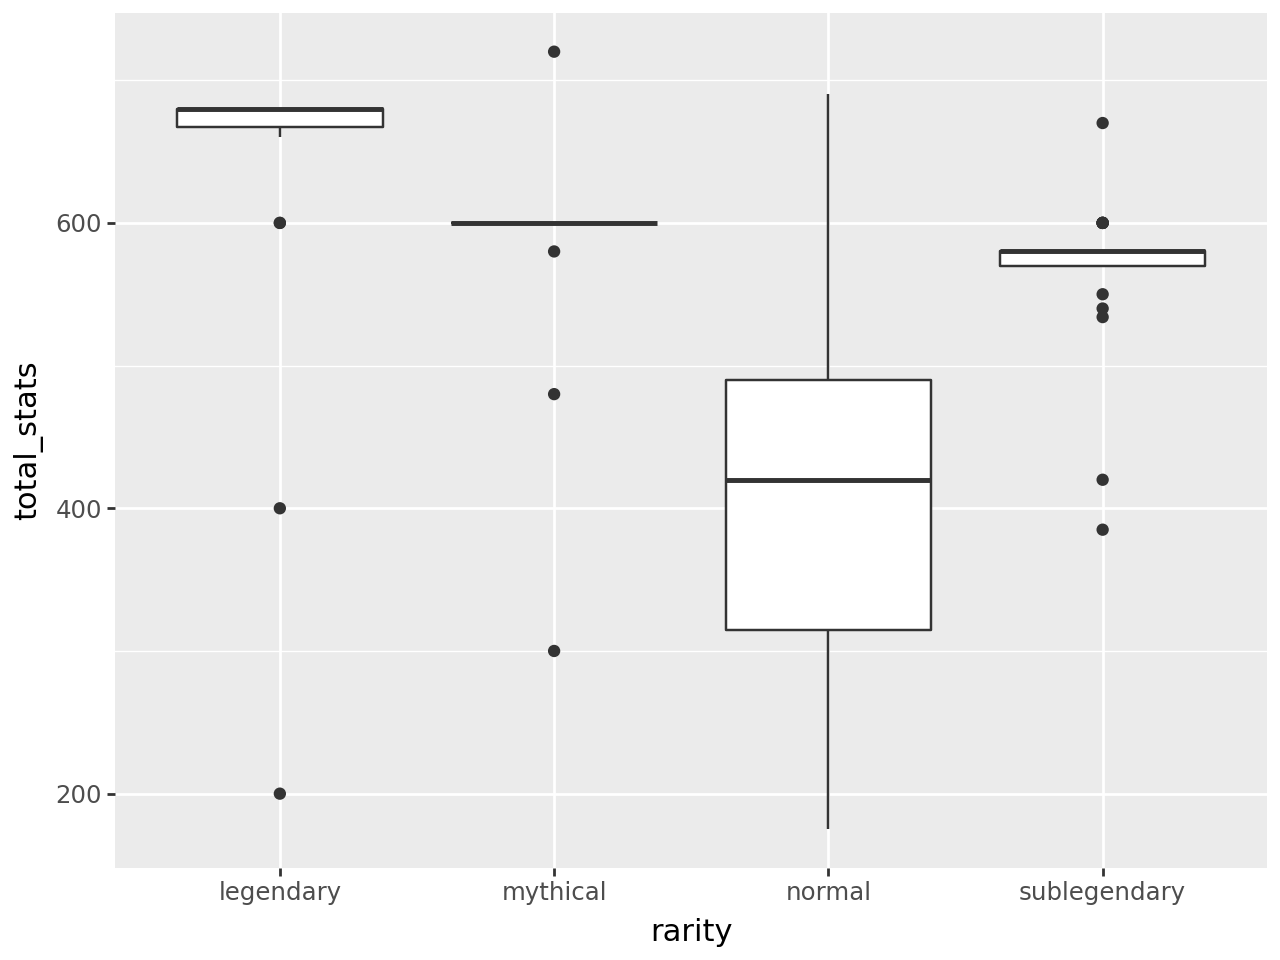

In [ ]:
# Example

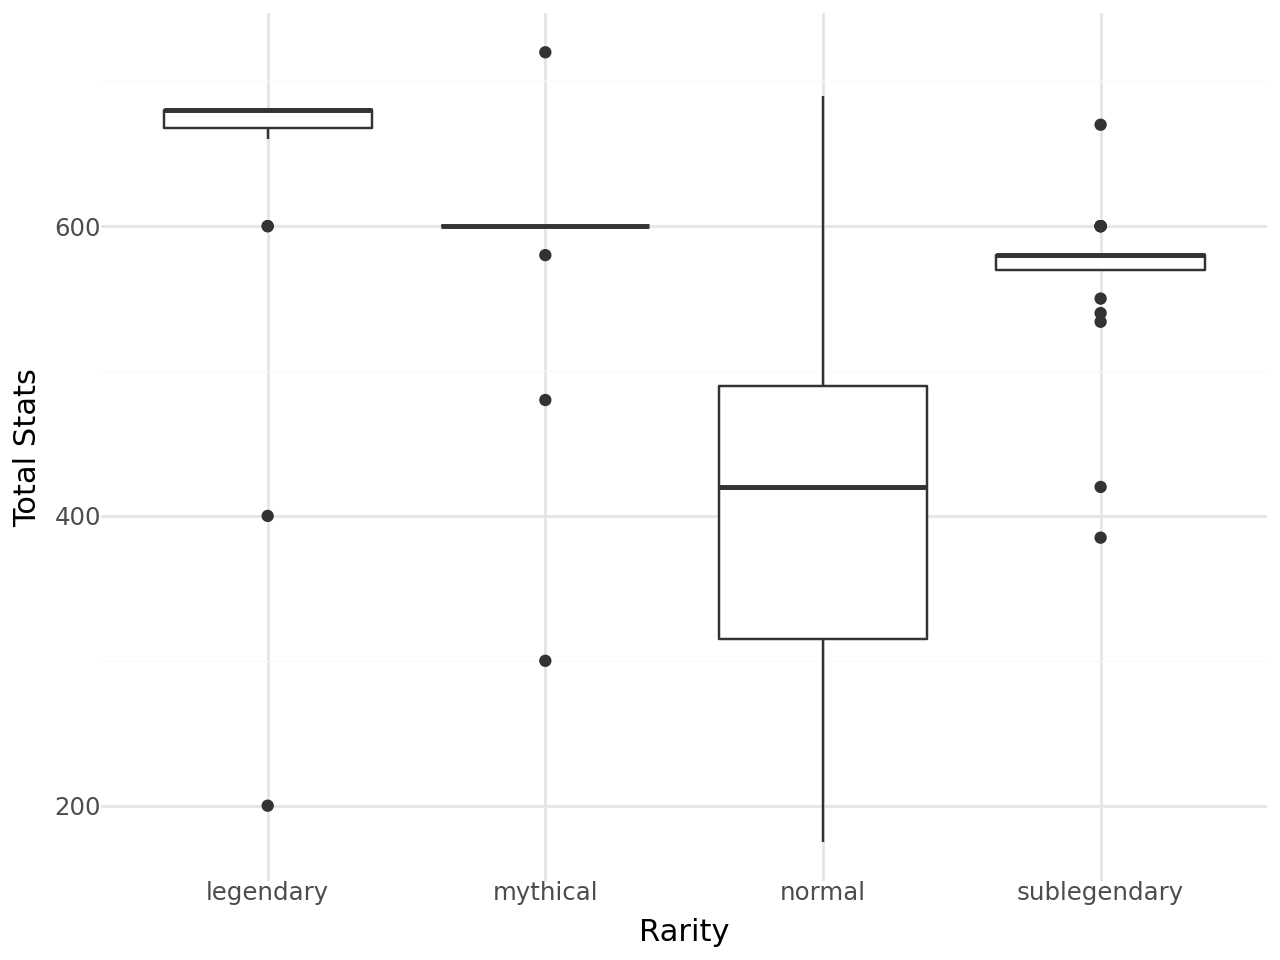

In [14]:
pokemon["total_stats"] = (
    pokemon["hp"]
    + pokemon["attack"]
    + pokemon["defense"]
    + pokemon["sp_attack"]
    + pokemon["sp_defense"]
    + pokemon["speed"]
)
def get_rarity(row):
    if row["is_legendary"] == 1:
        return "legendary"
    elif row["is_mythical"] == 1:
        return "mythical"
    elif row["is_sublegendary"] == 1:
        return "sublegendary"
    else:
        return "normal"

pokemon["rarity"] = pokemon.apply(get_rarity, axis=1)

from plotnine import *

(
    ggplot(pokemon, aes(x="rarity", y="total_stats"))
    + geom_boxplot()
    + labs(
        x="Rarity",
        y="Total Stats"
    )
    + theme_minimal()
)

**Q4**: Total stats x gen x primary type:

Plot a boxplot showing the total stats x 2 Gen (1 and 8) x 5 Primarty type ('fire', 'grass', 'water', 'electric', 'bug').

Make sure this graph is easy to compare between gen 1 and 8.

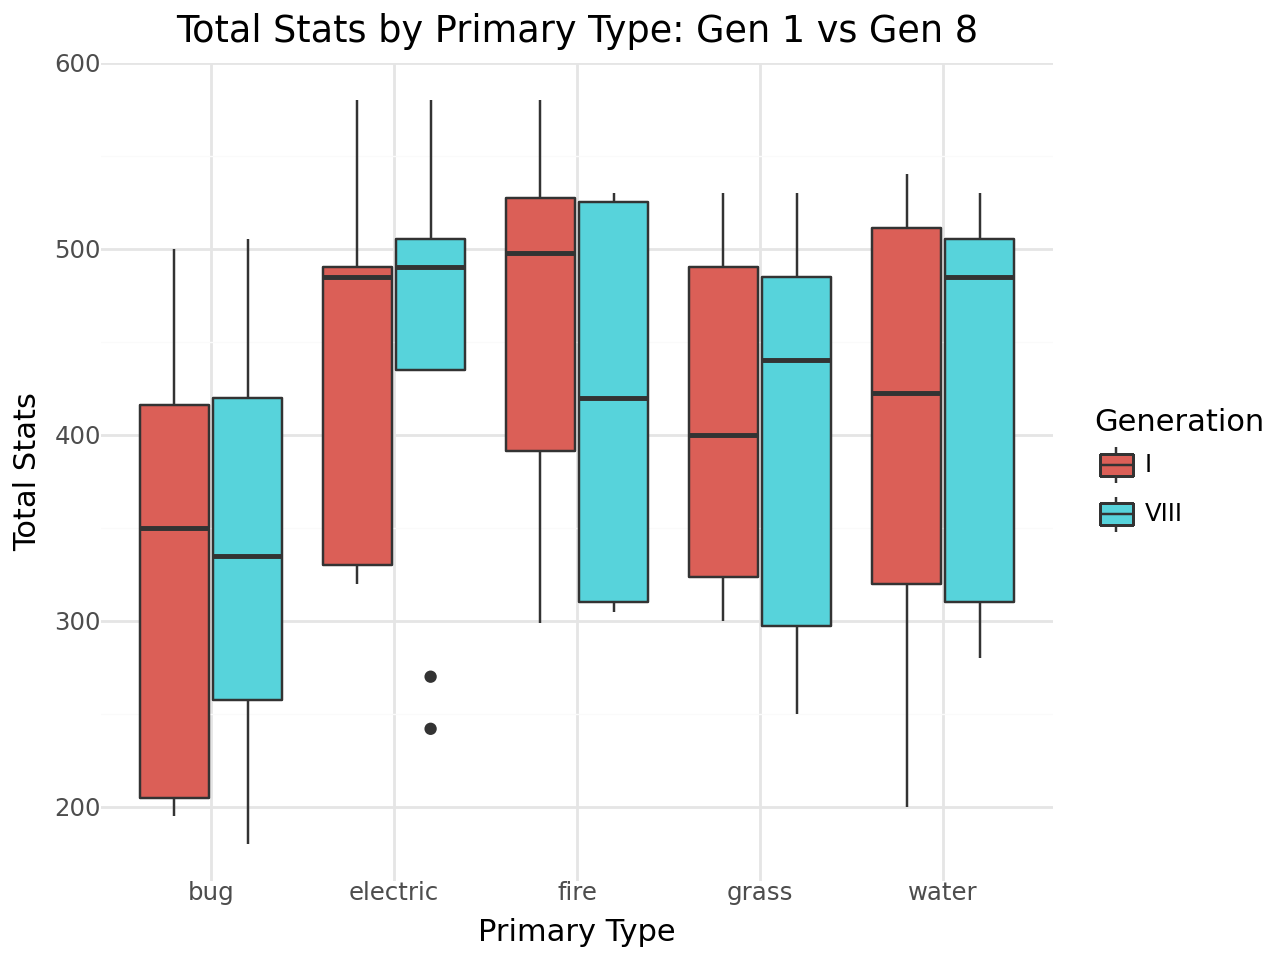

In [40]:
pokemon["total_stats"] = (
    pokemon["hp"]
    + pokemon["attack"]
    + pokemon["defense"]
    + pokemon["sp_attack"]
    + pokemon["sp_defense"]
    + pokemon["speed"]
)

pokemon["primary_type"] = pokemon["primary_type"].str.lower()

types = ["fire", "grass", "water", "electric", "bug"]

df_q4 = pokemon[
    (pokemon["gen"].isin(["I", "VIII"])) &
    (pokemon["primary_type"].isin(types))
]

df_q4.shape
from plotnine import *

(
    ggplot(
        df_q4,
        aes(
            x="primary_type",
            y="total_stats",
            fill="gen"
        )
    )
    + geom_boxplot(position=position_dodge(width=0.8))
    + labs(
        title="Total Stats by Primary Type: Gen 1 vs Gen 8",
        x="Primary Type",
        y="Total Stats",
        fill="Generation"
    )
    + theme_minimal()
)

**Q5**: EDA 3: Plot the distribution of all primary types (`barplot`) for every gen.
- Use `facet_wrap` with `gen`: `facet_wrap("gen")`. You can also change number of rows (`nrow`) and columns (`ncol`). [Documentation](https://plotnine.org/reference/facet_wrap.html)
- For better readability, you can rotate a_xis 90 degree using `theme(axis_text_x = element_text(angle = 90))` You can also make the graph bigger.
- If you know about pokemon, look at gen I subplot, does it make sense to you?

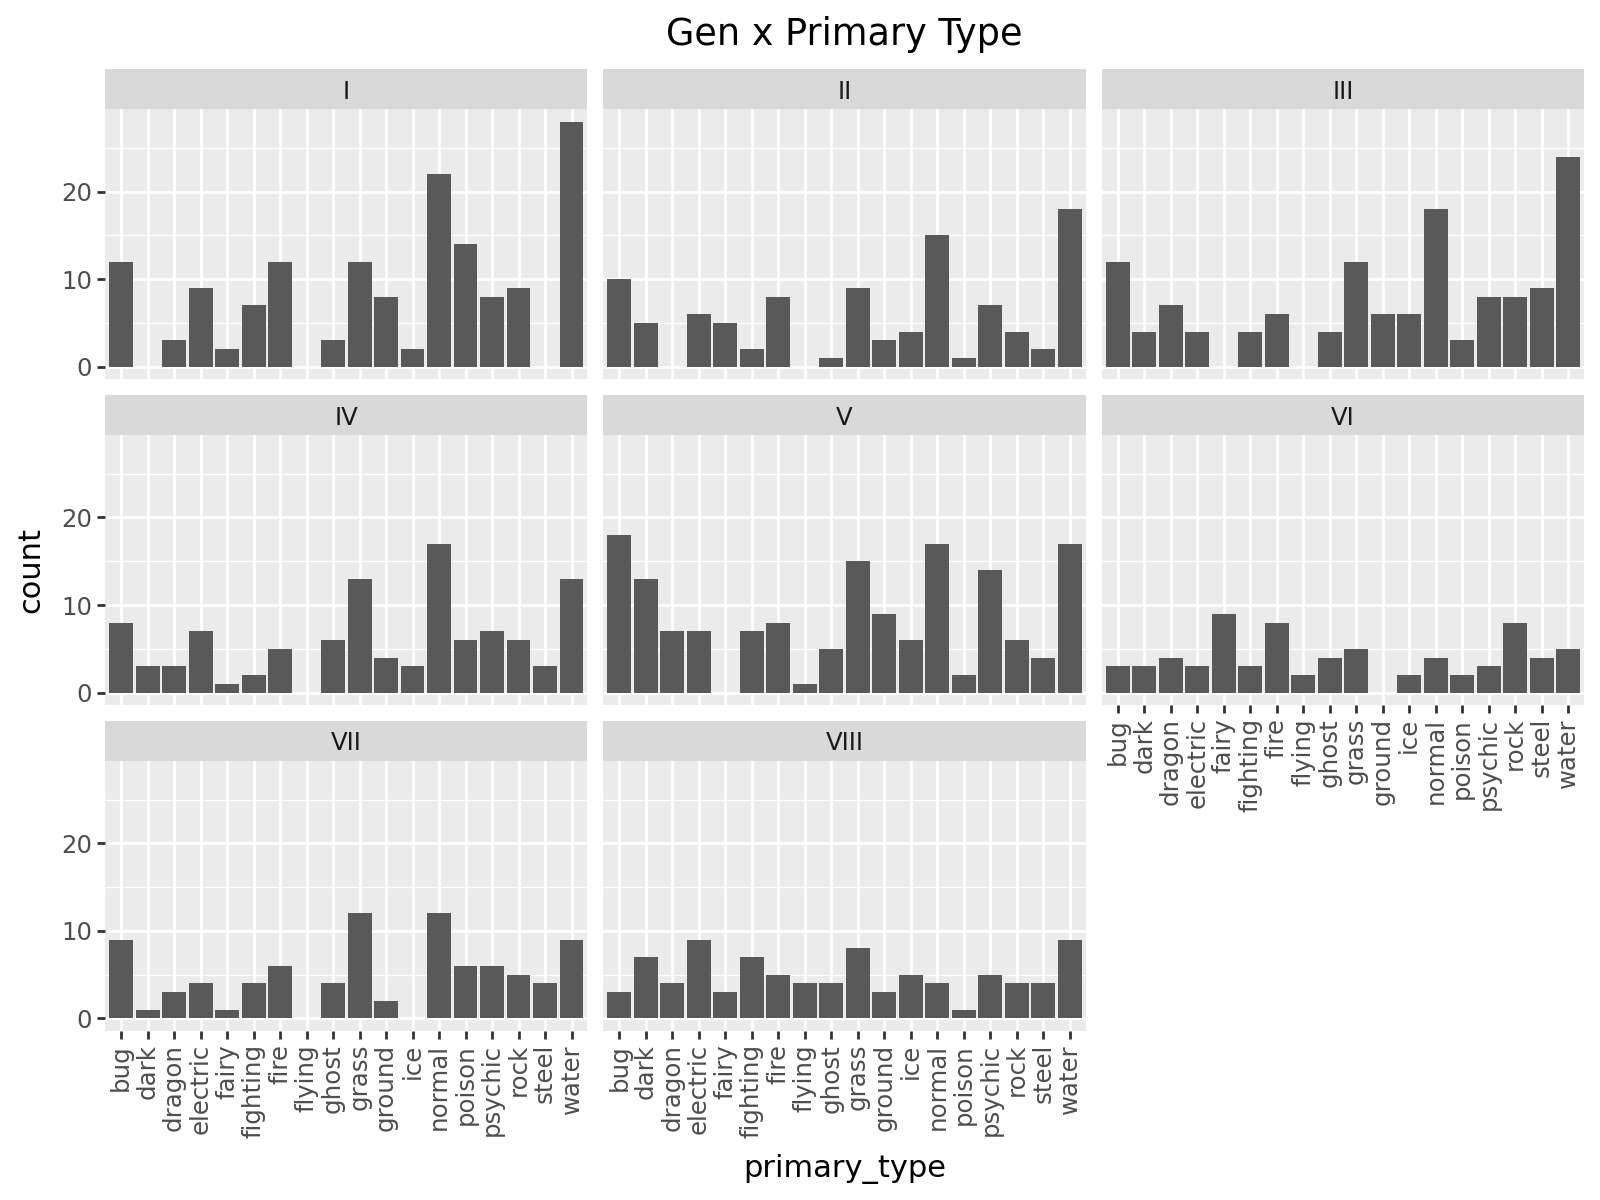

In [ ]:
# Example

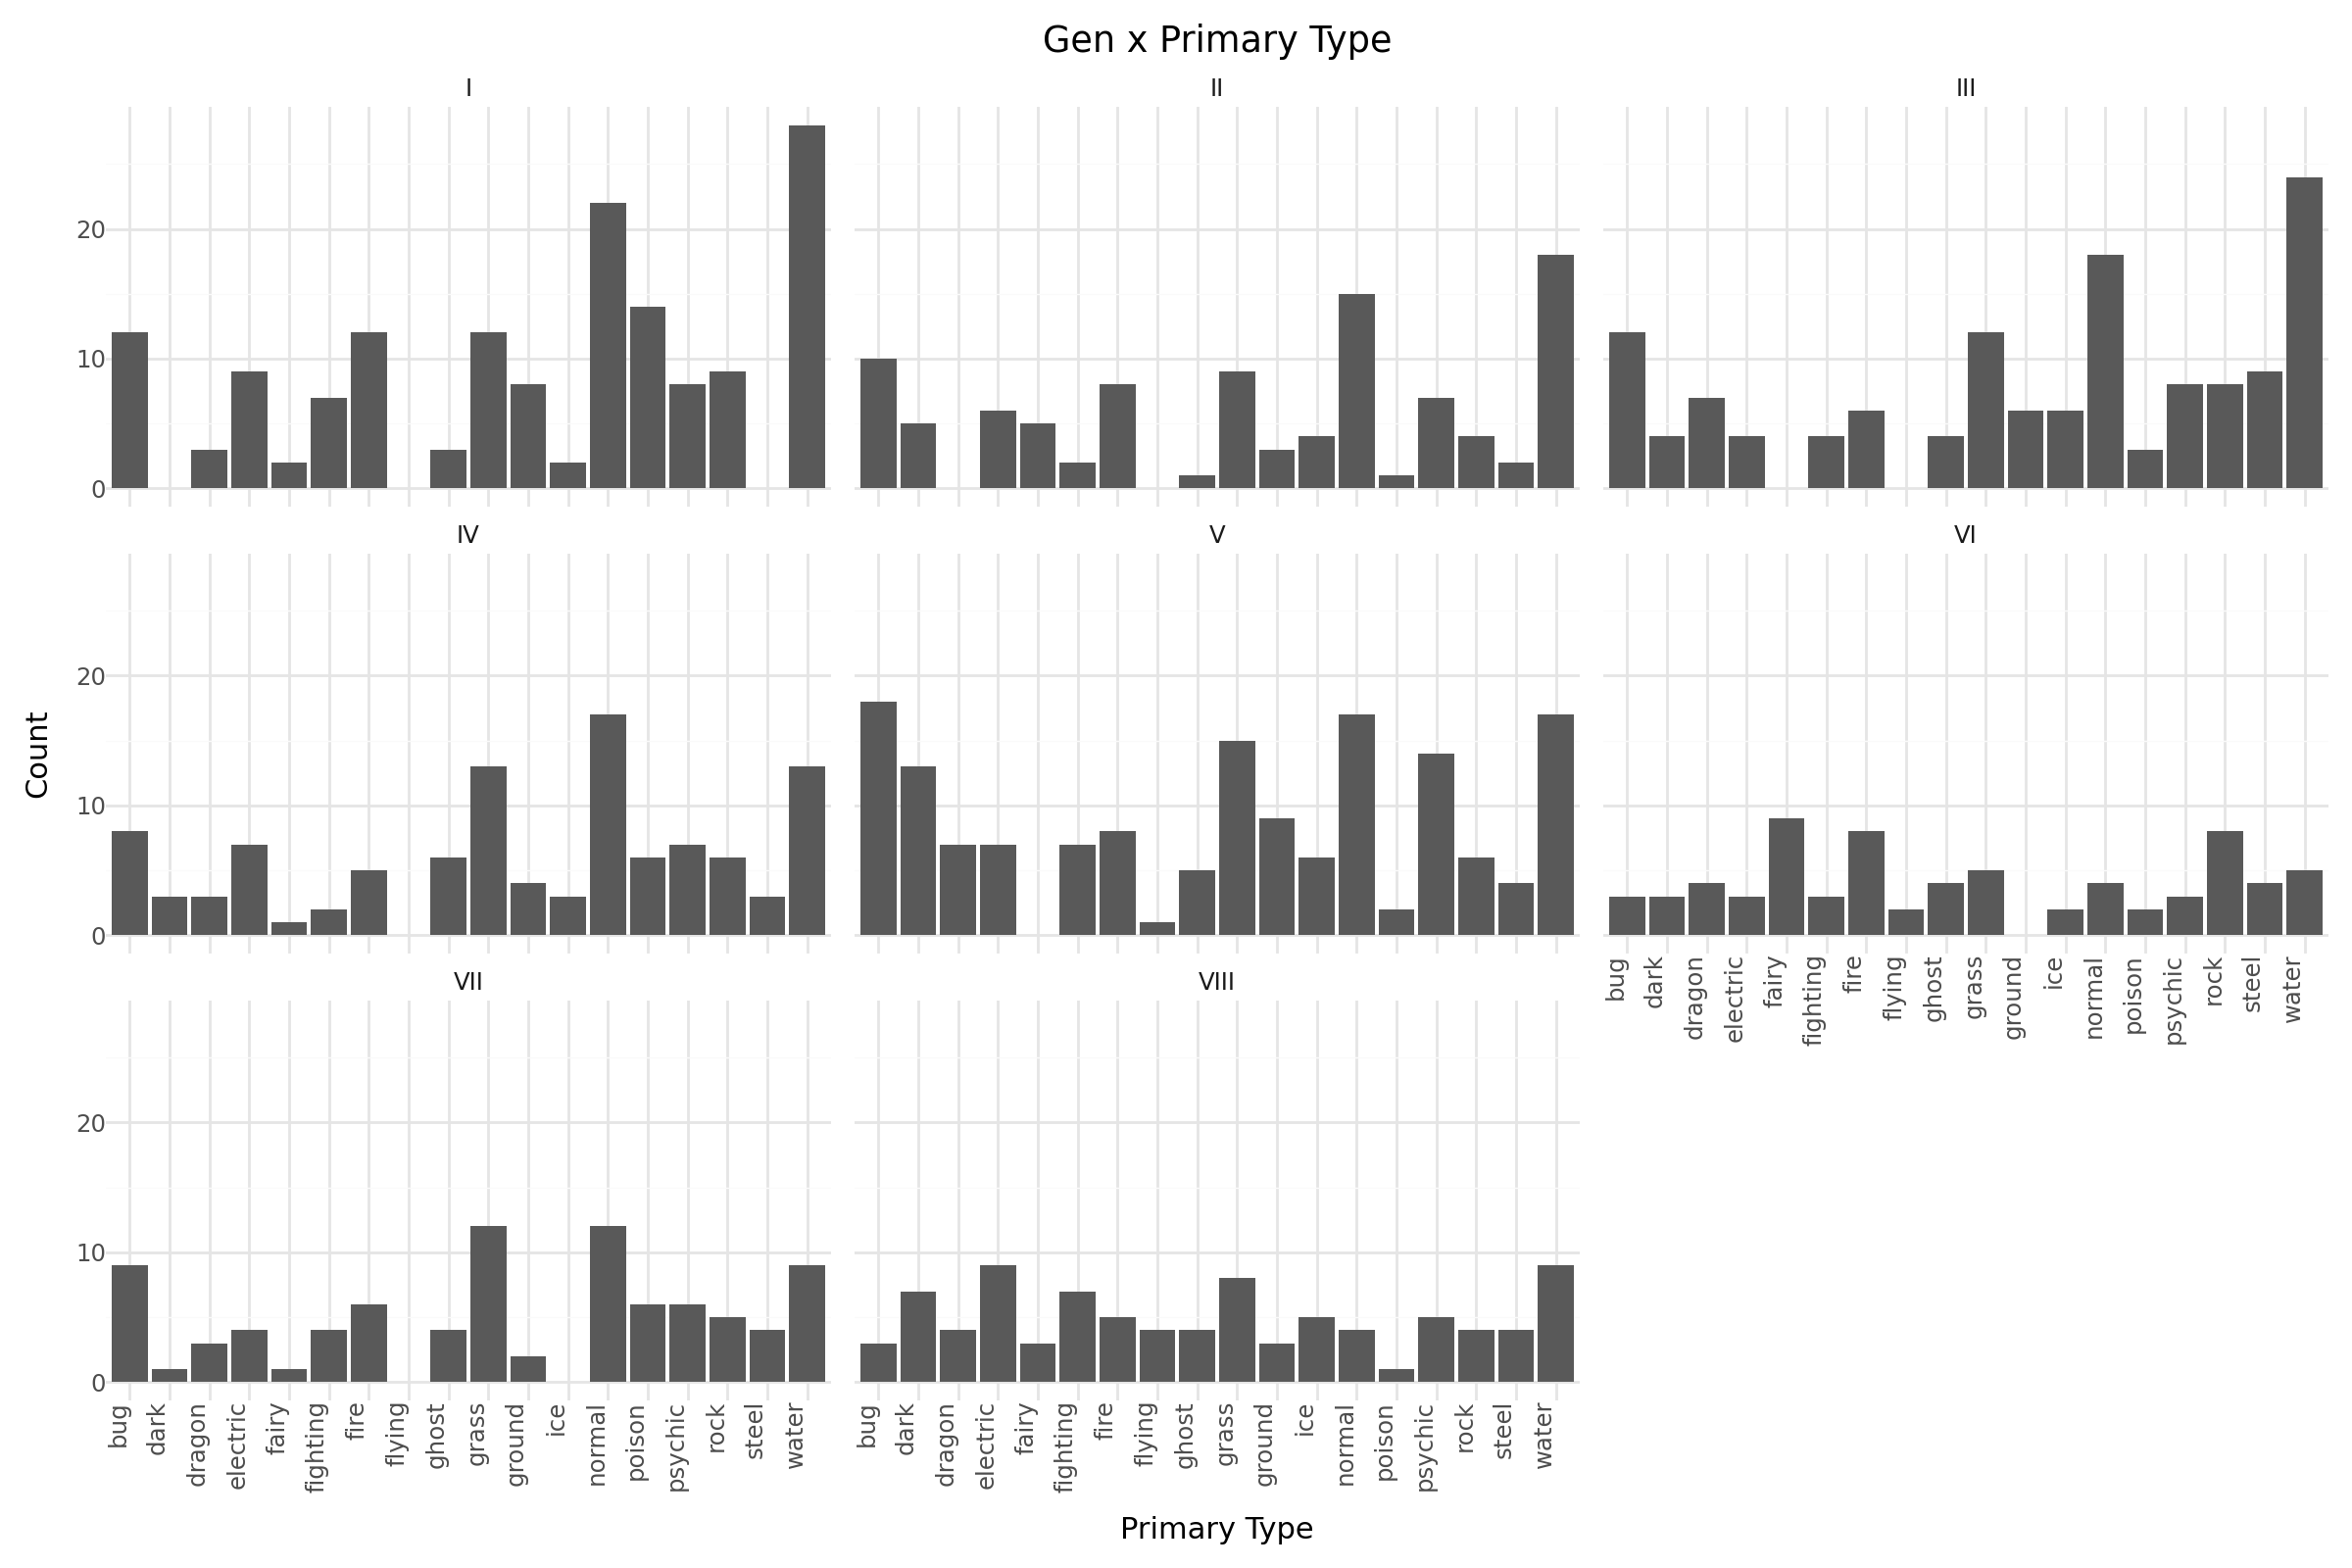

In [39]:
from plotnine import *

(
    ggplot(pokemon, aes(x="primary_type"))
    + geom_bar()
    + facet_wrap("gen", ncol=3)
    + labs(
        title="Gen x Primary Type",
        x="Primary Type",
        y="Count"
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(angle=90, hjust=1),
        figure_size=(12, 8)
    )
)
